In [93]:
__author__ = 'intuinno'
%matplotlib inline

import matplotlib.pylab 
import pandas as pd
import json
import re
import codecs
from nltk import *

f = codecs.open('../other_data/hedonometer/hedonometer.json',mode='r',encoding='utf-8')

contents = f.read()

a = json.loads(contents)

wordlist = a['objects']

hedonDict = {}
for w in wordlist:
    hedonDict[w['word']] = w['happs']

print hedonDict['laughter']

trimmed_user_status = pd.read_csv('../project_materials/mypersonality_depression/trimmed_user_statuses.csv', encoding='cp1252')


def calculateHappyness(s):
    words = word_tokenize(s)
    score = 4
    count = 1
    for w in words:
        if w.lower() in hedonDict:
            score += hedonDict[w.lower()]
            count += 1
    return score / count


def calculateHappynessRow(row):
    s = row['status_update']
    words = word_tokenize(s)
    score = 4
    count = 1
    for w in words:
        if w.lower() in hedonDict:
            score += hedonDict[w.lower()]
            count += 1
    return score / count


print calculateHappyness('Happier terror')


print calculateHappyness('happy terror laughter')


print calculateHappyness(trimmed_user_status['status_update'][3])



8.5
2.88
5.64
5.38333333333


In [94]:
allData = trimmed_user_status.fillna('0')
# test.apply(calculateHappynessRow, axis=1)
allData['happy'] = allData.apply(calculateHappynessRow, axis=1)

In [95]:
allData['date'] = pd.to_datetime(allData['date'])
allData.index = allData['date']

In [96]:
g = allData.groupby(pd.TimeGrouper("M"))
g

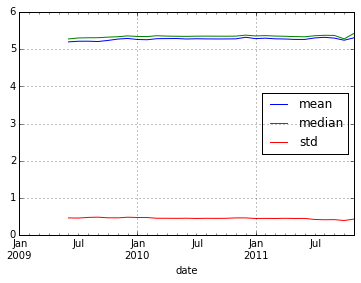

In [97]:
g2 = allData.happy.resample('M', how=['mean','median','std'])
g2.plot()
matplotlib.pylab.savefig('temporalMonthly.pdf')
# g2['mean'].plot()
                 

date
2009-01-31    5.349530
2009-02-28         NaN
2009-03-31         NaN
2009-04-30         NaN
2009-05-31         NaN
2009-06-30    5.197538
2009-07-31    5.213599
2009-08-31    5.214950
2009-09-30    5.206339
2009-10-31    5.235079
2009-11-30    5.271255
2009-12-31    5.289230
2010-01-31    5.261022
2010-02-28    5.254494
2010-03-31    5.283084
2010-04-30    5.285102
2010-05-31    5.286650
2010-06-30    5.273823
2010-07-31    5.280891
2010-08-31    5.276941
2010-09-30    5.274897
2010-10-31    5.275735
2010-11-30    5.278146
2010-12-31    5.320526
2011-01-31    5.284209
2011-02-28    5.296152
2011-03-31    5.278695
2011-04-30    5.274143
2011-05-31    5.262537
2011-06-30    5.262783
2011-07-31    5.302107
2011-08-31    5.319987
2011-09-30    5.298089
2011-10-31    5.241356
2011-11-30    5.306246
Freq: M, Name: happy, dtype: float64


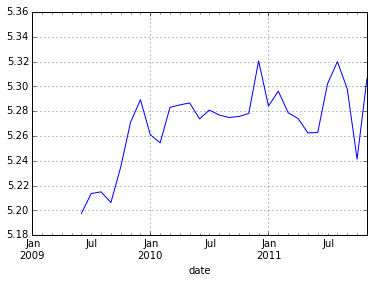

In [98]:

# plt.figure()
# neuroticism.neu.plot(kind='hist', alpha=0.5)
print g.happy.mean()
ax = g.happy.mean().plot()

matplotlib.pylab.savefig('temporalMonthly2.pdf')



In [99]:
allData['month'] = allData.index.month
allData['weekday'] = allData.index.weekday
allData['hour'] = allData.index.hour

In [100]:
import numpy as np
weekday = allData.groupby('weekday').aggregate(np.mean)
print weekday


            happy     month       hour
weekday                               
0        5.269694  6.459785  11.800859
1        5.263754  6.629757  11.813833
2        5.266945  6.618665  11.835122
3        5.280069  6.617114  11.810882
4        5.289643  6.517954  11.650970
5        5.274055  6.515904  11.838128
6        5.281840  6.569946  12.121703


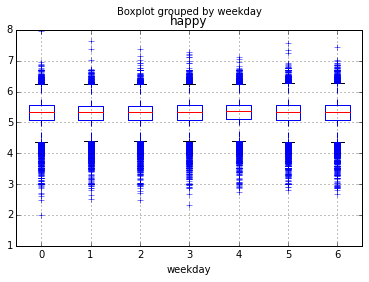

In [101]:
allData.boxplot(column=['happy'], by='weekday')

matplotlib.pylab.savefig('temporalWeekly3.pdf')

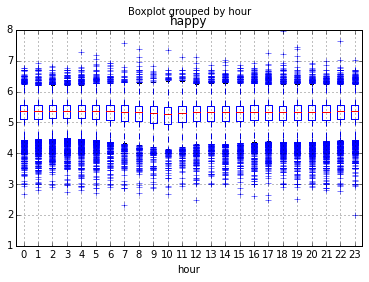

In [102]:
allData.boxplot(column=['happy'], by='hour')

matplotlib.pylab.savefig('temporalhour1.pdf')

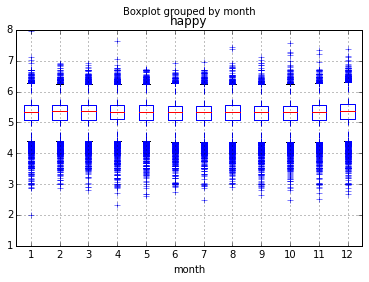

In [103]:
allData.boxplot(column=['happy'], by='month')

matplotlib.pylab.savefig('temporalmonth4.pdf')

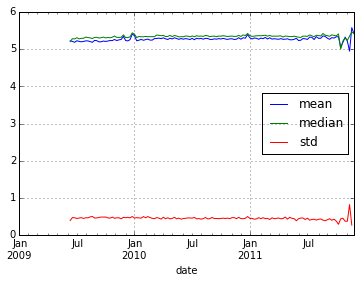

In [104]:
g2 = allData.happy.resample('W', how=['mean','median','std'])
g2.plot()
# g2['mean'].plot()

### Now we will get the only the depressed people

In [105]:
cesd_score = pd.read_csv('../project_materials/mypersonality_depression/939_userScores.csv')
cesd_score.head()

,userid,time_completed,CES-D_score
0,a54988e326d76a28f52a4b82d0efcd5d,2011-02-06 15:21:07,24
1,ef3cdac5925aa968584c541faea886e6,2011-02-08 23:39:31,18
2,66495ec54feb9e2399db05a67a80f2c6,2011-02-08 23:51:17,16
3,b57dcbe1b484eb302cb9da59bf83f6a2,2011-02-09 02:26:13,34
4,b0e2b88d357007e73e1f12f3029a48eb,2011-02-09 04:29:58,25


In [106]:
depressed = cesd_score[ cesd_score['CES-D_score'] > 30].dropna()
depressed.head()

,userid,time_completed,CES-D_score
3,b57dcbe1b484eb302cb9da59bf83f6a2,2011-02-09 02:26:13,34
6,beeb68b947eaec4a55a9d8d20a7c5b52,2011-02-09 05:16:22,33
7,0d4a51e22f36151b2e435ce3fd4eb6f9,2011-02-09 07:26:41,31
24,fc1c9fb6c64740edcbbf8cfe9dde8b02,2011-02-11 00:43:09,31
29,ab3b4c66fe29289ad91c38b572215748,2011-02-11 06:46:38,32


In [107]:
filteredData = pd.merge(allData, depressed, on='userid', how='inner', left_index=False)
filteredData.index = filteredData.date
filteredData.head()

,userid,date,status_update,happy,month,weekday,hour,time_completed,CES-D_score
date,,,,,,,,,
2009-07-09 19:08:55,a36b5610cdc120eda6507c40adc597c8,2009-07-09 19:08:55,0,4.000000,7,3,19,2011-04-21 15:00:55,36
2009-07-09 19:08:55,a36b5610cdc120eda6507c40adc597c8,2009-07-09 19:08:55,Life is good and short. Smile and enjoy!,6.040000,7,3,19,2011-04-21 15:00:55,36
2009-06-19 07:55:12,a36b5610cdc120eda6507c40adc597c8,2009-06-19 07:55:12,I am blessed!,5.770000,6,4,7,2011-04-21 15:00:55,36
2009-06-19 07:46:34,a36b5610cdc120eda6507c40adc597c8,2009-06-19 07:46:34,happy b'day Shane! You rock!,6.170000,6,4,7,2011-04-21 15:00:55,36
2009-07-14 04:11:28,a36b5610cdc120eda6507c40adc597c8,2009-07-14 04:11:28,First be nice to everyone. Treat others how y...,5.807143,7,1,4,2011-04-21 15:00:55,36


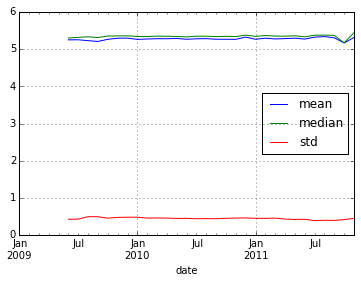

In [108]:
g2 = filteredData.happy.resample('M', how=['mean','median','std'])
g2.plot()
matplotlib.pylab.savefig('temporalMonthlyDepressed1.pdf')

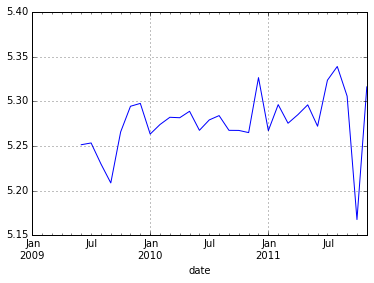

In [109]:
g2['mean'].plot()
matplotlib.pylab.savefig('temporalMonthlyDepressed2.pdf')

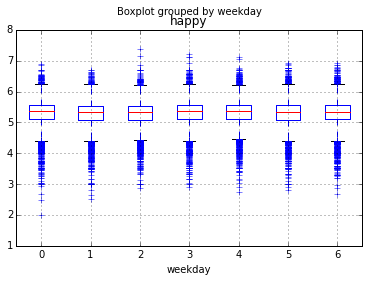

In [110]:
filteredData.boxplot(column=['happy'], by='weekday')

matplotlib.pylab.savefig('temporalWeeklyDepressed3.pdf')

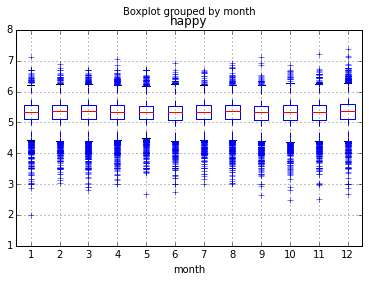

In [111]:
filteredData.boxplot(column=['happy'], by='month')

matplotlib.pylab.savefig('temporalMonthlyDepressed3.pdf')

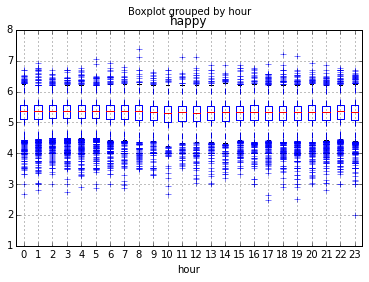

In [112]:
filteredData.boxplot(column=['happy'], by='hour')

matplotlib.pylab.savefig('temporalHourlyDepressed3.pdf')

In [113]:
### Now let's get the CSV score. 


In [114]:
import multiprocessing as mp

def clearFile(id):
    fSource = codecs.open('../project_materials/mypersonality_neuroticism/text/step2/' + id + '_step2.txt',mode='r',encoding='utf-8')

    fDestination = codecs.open('../project_materials/mypersonality_neuroticism/text/step3/' + id + '_step3.txt',mode='w',encoding='utf-8')

    contents = fSource.read()
    
    contentsFiltered = contents.replace('\"','').replace('\\','')
    
#     for i,line in enumerate(fSource):
    fDestination.write( contentsFiltered)
    

pool = mp.Pool(processes=1)

a = '../other_data/neuroticism_tokenized/' + neuroticism['userid'] + '_d_tokens.txt'
b = a.values.tolist()

result = pool.map(liwcMPparseFileName, b)

NameError: name 'neuroticism' is not defined